## 케창딥7 keras

### Sequential 모델


In [5]:
# Sequential 클래스

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [8]:
# 점진적으로 Sequential 모델 만들기
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

## model.weights

In [9]:
# 가중치를 만들기위한 모델 호출  : build 메서드 호출전에는 가중치가 없다. 
# 아래 코드의 빌드로 이제 모델은 크기가 (3,) 안 샘플을 기대한다. 
# 입력크기의 none 은 어떤 배치크기도 가능하다는 의미

model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_10/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.18836498,  0.05838525,  0.1319918 , -0.17338154, -0.16577797,
          0.19982404, -0.2882865 , -0.18645887,  0.03212088, -0.04200274,
          0.15520355, -0.10929705, -0.07839528, -0.17367747, -0.2767066 ,
          0.06690407,  0.14482895, -0.283819  ,  0.07172778,  0.11833733,
          0.17848822,  0.12427387,  0.21947676, -0.01607201,  0.18862277,
         -0.17261861, -0.17799649,  0.22877711, -0.00123161,  0.20765251,
         -0.01653826,  0.16803077,  0.1488834 ,  0.06411493,  0.07532397,
          0.18351415,  0.07068667, -0.13695881,  0.02842981,  0.05239549,
         -0.25366536,  0.03391585, -0.1537134 , -0.2642925 , -0.23893005,
          0.10578561,  0.20318758,  0.10171118, -0.0925675 , -0.19901758,
         -0.24832958, -0.27441663, -0.27571642, -0.28551736,  0.2688638 ,
         -0.25667816,  0.01536751,  0.24196452, -0.24179415,  0.09498268,
          0.18779534,  0.18928686,  0.0463

In [10]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                256       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [11]:
# name 매개변수로 모델과 층에 이름 지정하기

model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_first_layer (Dense)       (None, 64)                256       
_________________________________________________________________
my_last_layer (Dense)        (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 모델의 입력 크기를 미리 지정하기

model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                256       
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                256       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### 함수형 API

In [14]:
##두 개의 Dense 층을 가진 간단한 함수형 모델

inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)


In [15]:
#  뜯어보기
inputs = keras.Input(shape=(3,), name="my_input")
inputs.shape

TensorShape([None, 3])

In [16]:
inputs.dtype

tf.float32

In [18]:
# features 뜯어보기

features = layers.Dense(64, activation="relu")(inputs)
features.shape
# features 뜯어보기

TensorShape([None, 64])

In [19]:
# outputs 뜯어보기

outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_input (InputLayer)        [(None, 3)]               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                256       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


## 다중 입력, 다중 출력 함수형 모델

In [21]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

In [22]:
# 다중 입력, 다중 출력 모델 훈련하기
# 입력과 타깃 배열 리스트를 전달하여 모델 훈련하기


import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))  ## ( 1280 * 10000)
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 7ms/step - loss: 10.2351 - priority_loss: 0.3321 - department_loss: 9.9030 - priority_mean_absolute_error: 0.5004 - department_accuracy: 0.2812


In [24]:
# 입력과 타깃 배열을 딕셔너리로 전달하여 모델 훈련하기
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 8ms/step - loss: 16.1381 - priority_loss: 0.3321 - department_loss: 15.8060 - priority_mean_absolute_error: 0.5004 - department_accuracy: 0.1328


## 함수형 API의 장점: 층 연결 구조 활용하기

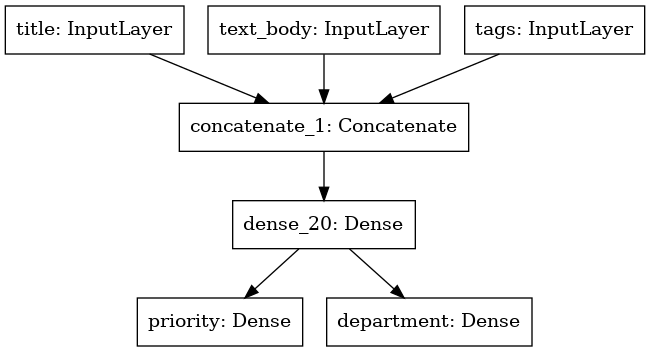

In [25]:
keras.utils.plot_model(model, "ticket_classifier.png")

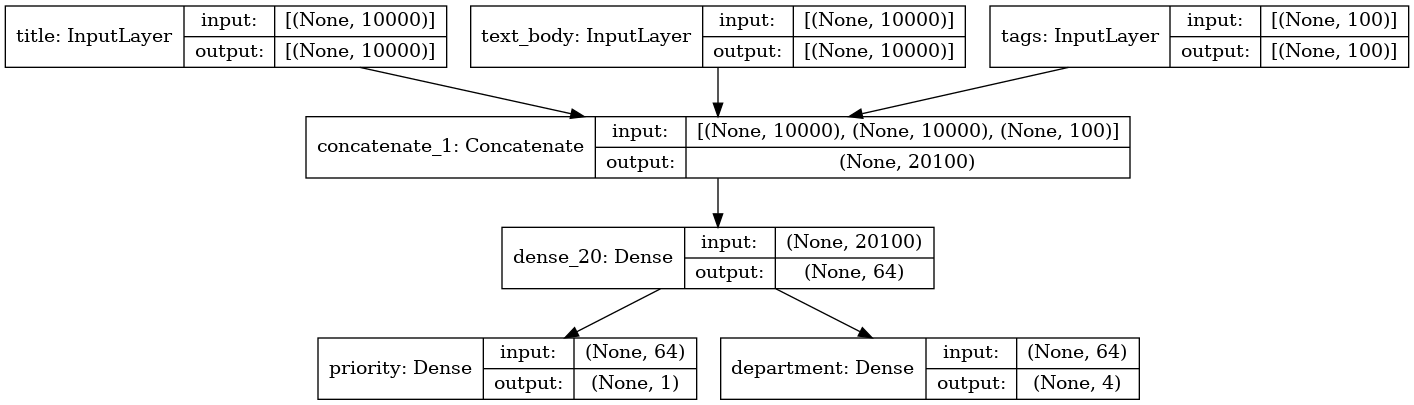

In [26]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

## Model 서브클래싱

In [30]:
#간단한 서브클래싱 모델
# 레이어 와 모델의 상속의 차이는 레이어는 모델을 만드는데 사용하는 구성요소고 
# 모델은 실제 훈련하고 추론하는 최상위 객체
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department


In [32]:
# 객체를 호출할때 가중치를 만들음

model = CustomerTicketModel(num_departments=4)

priority, department = model({"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [33]:
# 모델을 사용하여 만든것은 컴파일하고 훝련한다.

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 [==============================] - 1s 8ms/step - loss: 26.8170 - output_1_loss: 0.3313 - output_2_loss: 26.4857 - output_1_mean_absolute_error: 0.4996 - output_2_accuracy: 0.5617


In [ ]:
## 여러방식을 사용하기 



In [34]:
## 조별 과제


from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

import tensorflow as tf
from tensorflow import keras

# Quest: 사용자 정의 훈련 스텝을 사용하는 모델
class CustomModel(keras.Model):
    def train_step(self, data): ##   train step 함수정의
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions)
        return {m.name: m.result() for m in self.metrics}

from tensorflow.keras import layers

inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/3
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2955 - sparse_categorical_accuracy: 0.9124
Epoch 2/3
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1643 - sparse_categorical_accuracy: 0.9533
Epoch 3/3
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1395 - sparse_categorical_accuracy: 0.9620


- 오늘의 노트북 파일에 모의실험 및 조별 발표 시 기록했던 내용
1. CustomModel class를 생성하고 train_step 함수를 정의 한다
    train_step 는 순전파 역전파 과정을 순차적으로 코딩.
2. compile 하고 모델 핏...

- 회고
CustomModel class 를 생성하고 CustomModel class 에서 loss 와 gradients 를 구해서 gradients 를  optimizering 홰주는 과정을 다 설계하고 개발하는 것이 사용자가 집접 설계 개발 장점이 있다....지만 생산성? 재사용성? 퍼포먼스 측면에서 더 나은 건지 모르겠다.
